In [2]:
import pandas as pd
import geopandas as gpd # used for the bonus question
from shapely.geometry import Point # for the bonus
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # I like this style better for plotting

In [3]:
!ls data

shipping_data.csv


First thing first, let's have a look at the dataframe.

In [4]:
df = pd.read_csv('data/shipping_data.csv')

In [5]:
df

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
0,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",departure,Vessel departure from transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",ais,2024-06-29 07:15:06.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
1,09dbaf79-6a76-4efd-a511-663cf9cdd1c2,2024-06-21 22:16:30.000 Z,511e6a19-f4a8-40f0-a7c4-5e1e4d5e90ca,2024-07-30 10:08:45.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Itapoa"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",berth,Vessel arrived,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Hong Kong"",\n...",ais,2024-06-18 07:44:20.000 Z,False,PIDU4240363,"{\n ""imo"": ""9793959"",\n ""mmsi"": ""477233200"",...",Pacific International Lines
2,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Inbound/Outbound Laden Ctnr Move From One Pier...,Gate out,Truck,"{\n ""bic_cd"": null,\n ""city"": null,\n ""coun...",carrier,2024-06-29 00:50:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
3,924b8c26-7f7a-419b-9d81-c4857a918b8e,2024-06-17 16:50:59.000 Z,2c5eb28d-67fb-4114-9ee3-47cafc7620f7,2024-08-12 16:34:34.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Mobile"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Rotterdam"",\n...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Veracruz"",\n ...",ais,2024-06-06 11:14:46.000 Z,False,SUDU5331459,"{\n ""imo"": ""9535163"",\n ""mmsi"": ""477346500"",...",Hamburg-Süd
4,001dd4c8-ac21-4042-b762-b6650815b649,2024-06-13 07:00:23.000 Z,bb20cbf7-52b1-48c7-bf10-776dced41dea,2024-07-03 20:19:47.000 Z,"{\n ""city"": ""Savannah"",\n ""country"": ""United...","{\n ""city"": ""Shenzhen"",\n ""country"": ""China""...",Laden Ctnr Loaded On Board Vessel.(Mother Vess...,Loaded on vessel at origin port,Vessel,"{\n ""city"": ""Shenzhen"",\n ""country"": ""China""...",carrier,2024-06-15 01:12:00.000 Z,False,WHLU5809684,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196198,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",berth,Vessel arrived,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",ais,2024-07-04 11:14:31.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196199,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Ningbo"",\n ""...",ais,2024-06-26 10:14:40.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196200,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",ais,2024-07-06 02:29:10.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196201,0041c459-2

My immediate impression is that the `reference_id` will be useful for matching up the same shipment as it gets updated. I'm going to try to sort by that to verify my understanding.

In [6]:
df.dtypes

REFERENCE_ID            object
REFERENCE_CREATED_AT    object
REFERENCE_UPDATE_ID     object
DATA_UPDATED_AT         object
DESTINATION_PORT        object
ORIGIN_PORT             object
RAW_DESCRIPTION         object
EVENT_DESCRIPTION       object
EVENT_MODE              object
EVENT_LOCATION          object
EVENT_SOURCE            object
EVENT_TIMESTAMP         object
PLANNED                 object
CONTAINER_ID            object
RELATED_VESSEL          object
CARRIER_NAME            object
dtype: object

In [7]:
print(len(df), len(df[df['PLANNED']==True]), len(df[df['PLANNED']==True])/len(df))

196203 36170 0.18434988251963527


About 20% of the events are planned, meaning they haven't occured yet, I'm planning on distinguishing between planned and actually occured throughout this exercise.

In [8]:
df['REFERENCE_ID'].nunique()

578

In [9]:
df[df['PLANNED']==False]['REFERENCE_ID'].nunique()

578

REFERENCE_ID
005f3f35-add9-45b3-9e51-c57f26a27f1a    3456
58bbae2e-03d0-4cea-8644-479d0d8281cf    3222
00424cd6-a9c7-4f4a-9277-2c9e9bf46574    2355
00805026-2aa1-4627-b585-3c2b150b51a8    2273
0041c459-27e8-4476-9620-d7ecf54319e8    2269
                                        ... 
012586a9-dc10-4172-a9a3-2d5e298c6a4b       2
0f16aa0b-12a8-4feb-91d6-fec08f7bd203       1
006fd8eb-411d-434a-86a5-d2c3ae900e91       1
00b5ebeb-bea0-41d2-bac2-264ff4bf3094       1
01799592-657a-48fc-b876-01d3b2810182       1
Name: count, Length: 578, dtype: int64


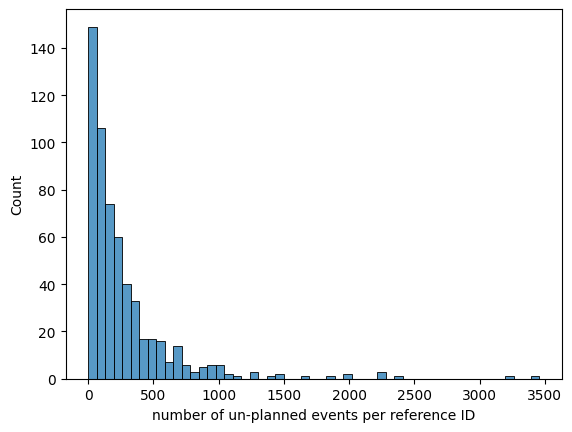

In [10]:
repeated_refs = df[df['PLANNED']==False]['REFERENCE_ID'].value_counts()
print(repeated_refs)
sns.histplot(repeated_refs)
plt.xlabel('number of un-planned events per reference ID')
plt.show()

There are 578 unique reference IDs. And some of these have up to 3000-ish unplanned (actually occuring) updates.

### Task 1:

There are eight core events expected to occur for each journey identified by “reference_id”. What are the rates for how often these events are present for each shipment? You may need to consider whether the container journey is completed for more recent shipments.

- overall
- overall per ocean carrier
- per each of the 8 core events overall
- per each of the 8 core events per ocean carrier

To get an idea of how to scale this sort of question, I'll first look at just the first reference ID.

In [12]:
first_id = df[df['REFERENCE_ID'] == '07bedccb-b83f-4d87-bc55-8ad54b9755c1']

In [13]:
first_id

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
0,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",departure,Vessel departure from transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",ais,2024-06-29 07:15:06.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
2,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Inbound/Outbound Laden Ctnr Move From One Pier...,Gate out,Truck,"{\n ""bic_cd"": null,\n ""city"": null,\n ""coun...",carrier,2024-06-29 00:50:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
129,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Laden Or Empty Transit Container Discharged Fr...,Discharged from vessel at transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",carrier,2024-06-28 19:56:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
134,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Empty Container Released To Shipper From Pier/...,Gate out from origin port,Truck,"{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",carrier,2024-06-15 15:06:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
340,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Laden Ctnr Loaded On Board Vessel.(Mother Vess...,Loaded on vessel at transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",carrier,2024-06-28 22:21:00.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175092,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,729bec92-bab8-45ba-b332-cfd735120818,2024-06-24 08:11:39.000 Z,"{\n ""city"": ""Norfolk"",\n ""country"": ""United ...","{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",Outbound Full Container Gate In To Peir/Termin...,Gate in at origin port,Truck,"{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",carrier,2024-06-18 20:38:00.000 Z,False,WHLU0639965,"{\n ""voyage"": ""TK""\n}",Wan Hai
175240,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,729bec92-bab8-45ba-b332-cfd735120818,2024-06-24 08:11:39.000 Z,"{\n ""city"": ""Norfolk"",\n ""country"": ""United ...","{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",Estimated time of arrival,Vessel arrival at transshipment port,Vessel,"{\n ""city"": ""Colombo"",\n ""country"": ""Sri Lan...",carrier,2024-06-26 18:30:00.000 Z,True,WHLU0639965,"{\n ""imo"": ""9793727"",\n ""mmsi"": ""563071300"",...",Wan Hai
175312,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,729bec92-bab8-45ba-b332-cfd735120818,2024-06-24 08:11:39.000 Z,"{\n ""city"": ""Norfolk"",\n ""country"": ""United ...","{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",Estimated time of departure,Ves

Look at event description for these 87 entries.

In [16]:
first_id[['EVENT_DESCRIPTION', 'EVENT_MODE', 'PLANNED', 'CARRIER_NAME']]

,EVENT_DESCRIPTION,EVENT_MODE,PLANNED,CARRIER_NAME
0,Vessel departure from transshipment port,Vessel,False,Wan Hai
2,Gate out,Truck,False,Wan Hai
129,Discharged from vessel at transshipment port,Vessel,False,Wan Hai
134,Gate out from origin port,Truck,False,Wan Hai
340,Loaded on vessel at transshipment port,Vessel,False,Wan Hai
...,...,...,...,...
175092,Gate in at origin port,Truck,False,Wan Hai
175240,Vessel arrival at transshipment port,Vessel,True,Wan Hai
175312,Vessel departure from origin port,Vessel,True,Wan Hai
175335,Loaded on vessel at origin port,Vessel,False,Wan Hai


Okay some of these are true in the planned column, meaning for those entries they hadn't happened yet. I'm going to filter for false to only get things that have happened.

In [20]:
first_id_true = first_id[first_id['PLANNED'] == False]

In [21]:
first_id_true['EVENT_DESCRIPTION'].value_counts()

EVENT_DESCRIPTION
Gate out from origin port                       12
Gate in at origin port                          12
Loaded on vessel at origin port                 11
Discharged from vessel at transshipment port     6
Vessel arrived                                   5
Vessel departure from transshipment port         2
Gate out                                         2
Loaded on vessel at transshipment port           2
Vessel arrival at transshipment port             2
Name: count, dtype: int64

The 8 core events:
- Gate out from origin port
- Gate in at origin port
- Loaded on vessel at origin port
- Vessel departure from origin port
- Vessel arrived at destination port
- Discharged from vessel at destination port
- Gate out from destination port
- Gate in empty return

So this specific reference id includes three core events related to the origin port. There are additional events that happen, but these are the three we're interested in. Let's return and look at the full dataframe with all reference IDs, but only look at the rates of events that have transpired:

In [22]:
df_past = df[df['PLANNED'] == False]

Look at all entries for this `EVENT_DESCRIPTION` column to make sure there aren't typos.

In [32]:
# Convert the value counts to a string and print the entire list without truncation
pd.set_option('display.max_rows', None)  # Ensure all rows are shown

df_past['EVENT_DESCRIPTION'].value_counts()

EVENT_DESCRIPTION
Vessel departed                                            28878
Vessel arrived                                             28842
Vessel departure from origin port                          19301
Loaded on vessel at origin port                            11504
Gate in at origin port                                     10780
Gate out from origin port                                   8947
Vessel arrived at destination port                          6344
Vessel departure from transshipment port                    5937
Vessel arrival at transshipment port                        5876
Loaded on vessel at transshipment port                      3711
Discharged from vessel at transshipment port                3566
Discharged from vessel at destination port                  3325
Gate out from destination port                              2774
Gate out empty                                              2651
Loaded on rail                                              1594
Gate in

Looks good enough to go ahead and filter for the core events. Set back to only displaying 10 entries per df.

In [24]:
pd.set_option('display.max_rows', 10)
core_events = ['Gate out from origin port',
               'Gate in at origin port',
               'Loaded on vessel at origin port',
               'Vessel departure from origin port',
               'Vessel arrived at destination port',
               'Discharged from vessel at destination port',
               'Gate out from destination port',
               'Gate in empty return']
filtered_df = df_past[df_past['EVENT_DESCRIPTION'].isin(core_events)]

In [36]:
print('len before', len(df_past), 'len after filtering for only 8 core events', len(filtered_df))
print(filtered_df['EVENT_DESCRIPTION'].value_counts())

len before 159834 len after filtering for only 8 core events 64330
EVENT_DESCRIPTION
Vessel departure from origin port             19301
Loaded on vessel at origin port               11504
Gate in at origin port                        10780
Gate out from origin port                      8947
Vessel arrived at destination port             6344
Discharged from vessel at destination port     3325
Gate out from destination port                 2774
Gate in empty return                           1355
Name: count, dtype: int64


We need to know how often these events are present for each shipment. 

I'd like to look at the event rate per reference ID. Use groupby to organize by `REFERENCE_ID` and `EVENT_DESCRIPTION`. Then calculate the number of times that event occurs for that reference ID. Also calculate the rate of how often the event is present for each shipment (compared to the other core events).

In [42]:
def calc_rate(df):
    event_counts = df.groupby(['REFERENCE_ID', 'EVENT_DESCRIPTION']).size().reset_index(name='event_count')
    total_events = df.groupby('REFERENCE_ID').size().reset_index(name='total_events')
    merged_df = pd.merge(event_counts, total_events, on='REFERENCE_ID')
    merged_df['rate'] = merged_df['event_count'] / merged_df['total_events']
    return merged_df

In [51]:
merged_df = calc_rate(filtered_df)

If we want to know overall rates, average by event across all reference IDs.

In [39]:
average_rates = merged_df.groupby('EVENT_DESCRIPTION')['rate'].mean().reset_index()
average_rates = average_rates.rename(columns={'rate': 'average_rate'})
print(average_rates)

                            EVENT_DESCRIPTION  average_rate
0  Discharged from vessel at destination port      0.083455
1                      Gate in at origin port      0.200534
2                        Gate in empty return      0.063636
3              Gate out from destination port      0.068517
4                   Gate out from origin port      0.186446
5             Loaded on vessel at origin port      0.194014
6          Vessel arrived at destination port      0.138228
7           Vessel departure from origin port      0.306831


If I also want to reconsider just looking at shipments that have completed (which I'm assuming the final event is `Gate in empty return`) I can first restrict to reference IDs that have this listed and then filter only for events in the core events and then rerun the rate calculation.

In [49]:
gate_in_ids = df_past[df_past['EVENT_DESCRIPTION'] == 'Gate in empty return']['REFERENCE_ID'].unique()
filtered_df_gate_in = df_past[df_past['REFERENCE_ID'].isin(gate_in_ids)]
done_shipping = filtered_df_gate_in[filtered_df_gate_in['EVENT_DESCRIPTION'].isin(core_events)]
rate_done_shipping = calc_rate(done_shipping)

In [50]:
average_rates = rate_done_shipping.groupby('EVENT_DESCRIPTION')['rate'].mean().reset_index()
average_rates = average_rates.rename(columns={'rate': 'average_rate'})
print(average_rates)

                            EVENT_DESCRIPTION  average_rate
0  Discharged from vessel at destination port      0.081076
1                      Gate in at origin port      0.181838
2                        Gate in empty return      0.063636
3              Gate out from destination port      0.065650
4                   Gate out from origin port      0.175737
5             Loaded on vessel at origin port      0.183321
6          Vessel arrived at destination port      0.141451
7           Vessel departure from origin port      0.290508


Pretty similar to the results above.

To segment this up by ocean carrier, 

In [52]:
def calc_rate_ocean_carrier(df):
    event_counts = df.groupby(['REFERENCE_ID', 'CARRIER_NAME', 'EVENT_DESCRIPTION']).size().reset_index(name='event_count')
    total_events = df.groupby('REFERENCE_ID').size().reset_index(name='total_events')
    merged_df = pd.merge(event_counts, total_events, on='REFERENCE_ID')
    merged_df['rate'] = merged_df['event_count'] / merged_df['total_events']
    return merged_df

In [54]:
carrier = calc_rate_ocean_carrier(done_shipping)

In [56]:
average_rates = carrier.groupby('CARRIER_NAME')['rate'].mean().reset_index()
average_rates = average_rates.rename(columns={'rate': 'average_rate'})
print(average_rates)

   CARRIER_NAME  average_rate
0           ANL      0.126437
1           APL      0.133333
2       CMA-CGM      0.132075
3         COSCO      0.185185
4   Hapag Lloyd      0.136364
..          ...           ...
16      Sealand      0.142857
17      Sinokor      0.185484
18      Wan Hai      0.179487
19    Yang Ming      0.129032
20          ZIM      0.136364

[21 rows x 2 columns]


### Task 2:

Import dwell time is calculated as the time from [Discharged from vessel at destination port] to [Gate out from destination port], giving you the time a container dwelled in a terminal before an out gate to the consignee. For shipments that have both of these events can you determine the import dwell time per shipment?

Return to the original df, filter by rows that have these labels in the `EVENT_DESCRIPTION`. Make two lists of the reference ids that have each of these entries, find the intersection of these two, and then filter the original df to include only these reference IDs, and then discard all events other than these two. Make a pivot table to include reference IDs where at least one of each of these events occurred. Also only get rows where the event it has already happened.

In [78]:
discharged_ids = df[df['EVENT_DESCRIPTION'] == 'Discharged from vessel at destination port']['REFERENCE_ID'].unique()
gate_out_ids = df[df['EVENT_DESCRIPTION'] == 'Gate out from destination port']['REFERENCE_ID'].unique()
valid_reference_ids = set(discharged_ids).intersection(gate_out_ids)
filtered_df = df[df['REFERENCE_ID'].isin(valid_reference_ids) & df['PLANNED'] == False]
events = ['Discharged from vessel at destination port',
               'Gate out from destination port']
filtered_df_dwell = filtered_df[filtered_df['EVENT_DESCRIPTION'].isin(events)]
event_pivot = filtered_df_dwell.pivot_table(index='REFERENCE_ID', columns='EVENT_DESCRIPTION', aggfunc='size', fill_value=0)
valid_reference_ids = event_pivot[(event_pivot[events[0]] > 0) & (event_pivot[events[1]] > 0)].index
filtered_df_dwell = filtered_df_dwell[filtered_df_dwell['REFERENCE_ID'].isin(valid_reference_ids)]

print(filtered_df_dwell[['REFERENCE_ID', 'EVENT_DESCRIPTION', 'EVENT_TIMESTAMP']])
print(filtered_df_dwell[['REFERENCE_ID', 'EVENT_DESCRIPTION', 'EVENT_TIMESTAMP']].dtypes)

                                REFERENCE_ID  \
83      10b3360f-5df8-4b5f-91c5-abda720128a5   
88      01d769d5-1a3e-4a82-8c91-4f036d5ec64a   
104     7fb0446d-fad0-464f-a8ee-bf44f20afa51   
113     005f7f0d-f796-4ef0-9048-9241c9386b08   
118     040eab22-de1b-496f-8ef4-91c98c6d482b   
...                                      ...   
196023  01096908-8a71-46e1-93ed-8172c8f77e39   
196055  0885e461-b78f-42a5-bbb4-2aabe98868bb   
196068  028ab5f2-ea21-45ac-bc83-1060b54642eb   
196153  02f23890-cae4-4ff2-b8cb-50fa8e3b6122   
196170  02f23890-cae4-4ff2-b8cb-50fa8e3b6122   

                                 EVENT_DESCRIPTION            EVENT_TIMESTAMP  
83                  Gate out from destination port  2024-06-21 13:10:00.000 Z  
88                  Gate out from destination port  2024-07-09 14:01:00.000 Z  
104                 Gate out from destination port  2024-07-06 21:56:00.000 Z  
113     Discharged from vessel at destination port  2024-08-04 08:28:00.000 Z  
118                 Gat

Make that timestamp column into a datetime, groupby the ref ID, and use the aggregation function to calculate the time difference.

In [79]:
filtered_df_dwell['EVENT_TIMESTAMP'] = pd.to_datetime(filtered_df_dwell['EVENT_TIMESTAMP'])
grouped_df = filtered_df_dwell.groupby('REFERENCE_ID').agg(
    event_duration=('EVENT_TIMESTAMP', lambda x: x.max() - x.min())
).reset_index()
grouped_df = grouped_df.rename(columns={'event_duration': 'duration'})
print(grouped_df)

                             REFERENCE_ID         duration
0    000368a8-f6ee-4b64-8703-962cb95d50f7 16 days 01:52:00
1    0003c20e-d825-4be4-b10c-c97ba64a5d14  6 days 00:27:00
2    0004450d-97e2-47cd-be1f-bb962adea35a  4 days 01:41:00
3    00046ba3-62c5-40a3-b3ef-5622ab09e113  2 days 18:57:00
4    0004dab1-0da0-42ad-b644-dc29ee66b537  4 days 20:40:00
..                                    ...              ...
376  58bbae2e-03d0-4cea-8644-479d0d8281cf  4 days 08:01:00
377  69b005e4-007c-4f13-82e5-aa6a34f60f25  2 days 18:10:00
378  707c4da7-c2b3-4b69-b7d0-832be28f76c0  1 days 04:30:00
379  7fb0446d-fad0-464f-a8ee-bf44f20afa51  6 days 03:02:00
380  924b8c26-7f7a-419b-9d81-c4857a918b8e  8 days 05:31:00

[381 rows x 2 columns]


Some of these durations are long. I want to look at one of them.

In [80]:
filtered_df_dwell[filtered_df_dwell['REFERENCE_ID'] == '000368a8-f6ee-4b64-8703-962cb95d50f7']

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
46382,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,2cec37d5-1dec-4000-9cdc-cf04301a2b26,2024-07-31 22:58:47.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Unloaded from 'HANSA ASIA 420N' at Port of Dis...,Discharged from vessel at destination port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-10 20:15:00+00:00,False,ONEU2302710,"{\n ""imo"": ""9459400"",\n ""mmsi"": ""538090582"",...",Ocean Network Express (ONE)
46615,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,2cec37d5-1dec-4000-9cdc-cf04301a2b26,2024-07-31 22:58:47.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Gate Out from Inbound Terminal for Delivery to...,Gate out from destination port,Truck,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-26 22:07:00+00:00,False,ONEU2302710,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Ocean Network Express (ONE)
52350,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,ff04bd7d-7600-496e-8c29-9666751f8bcb,2024-07-31 10:56:53.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Unloaded from 'HANSA ASIA 420N' at Port of Dis...,Discharged from vessel at destination port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-10 20:15:00+00:00,False,ONEU2302710,"{\n ""imo"": ""9459400"",\n ""mmsi"": ""538090582"",...",Ocean Network Express (ONE)
52631,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,ff04bd7d-7600-496e-8c29-9666751f8bcb,2024-07-31 10:56:53.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Gate Out from Inbound Terminal for Delivery to...,Gate out from destination port,Truck,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-26 22:07:00+00:00,False,ONEU2302710,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Ocean Network Express (ONE)
66865,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,8645e777-2624-40e5-8dcb-c8b572479b8a,2024-07-30 22:54:41.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Gate Out from Inbound Terminal for Delivery to...,Gate out from destination port,Truck,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-26 22:07:00+00:00,False,ONEU2302710,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Ocean Network Express (ONE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100096,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,e57fb2ff-451d-4a50-ae82-1aaa2765762c,2024-07-26 09:50:43.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Unloaded from 'HANSA ASIA 420N' at Port of Dis...,Discharged from vessel at destination port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-10 20:15:00+00:00,False,ONEU2302710,"{\n ""imo"": ""9459400"",\n ""mmsi"": ""538090582"",...",Ocean Network Express (ONE)
114923,000368a8-f6ee-4b64-8703-962cb95d50f7,2024-06-12 02:44:03.000 Z,dd5cd9d4-459a-467c-a7e5-b5046684c91a,2024-08-02 23:32:43.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",Unloaded from 'HANSA ASIA 420N' at Port of Dis...,Discharged from vessel at destination port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...",carrier,2024-07-10 20:15:00+00:00,False,ONEU2302710,"{\n ""imo"": ""9459400"",\n ""mmsi"": ""538090582"",...",Oc

Hmmmm there are more than two entries here, which is unexpected because I thought each reference ID should have only one destination port entry. I would want to look into this and see how often this happens if I had more time. It looks like this is all happening at the same destination (Manaus), but there are multiple entries at different times.

### Task 3:

Are origin and destination port values changing throughout the journey of a container? If so, how many container journeys are experiencing this?

Sort by reference ID, the columns of interest are `DESTINATION_PORT` and `ORIGIN_PORT`. First looking at the number of unique destination ports per reference ID.

                             REFERENCE_ID  ORIGIN_PORT
0    000368a8-f6ee-4b64-8703-962cb95d50f7            2
1    00037696-362d-4954-b22c-8409a76ebd8b            1
2    0003c20e-d825-4be4-b10c-c97ba64a5d14            1
3    0003c852-19a1-48c5-bc12-67c02a6b841a            2
4    0004450d-97e2-47cd-be1f-bb962adea35a            2
..                                    ...          ...
573  9548a2fb-d218-423c-887a-7f34aa813853            2
574  d6af0e06-532b-4feb-83ef-d78a4b95556a            2
575  d7a7d294-b01e-475f-929f-ab6e38a2b45e            3
576  e6cf9a38-4716-4e4b-9718-485f6a4091b8            2
577  f8c6f7fe-9af8-43a0-bf6d-9e22c95064eb            2

[578 rows x 2 columns]
                             REFERENCE_ID  DESTINATION_PORT
0    000368a8-f6ee-4b64-8703-962cb95d50f7                 2
1    00037696-362d-4954-b22c-8409a76ebd8b                 1
2    0003c20e-d825-4be4-b10c-c97ba64a5d14                 1
3    0003c852-19a1-48c5-bc12-67c02a6b841a                 2
4    0004450d-97

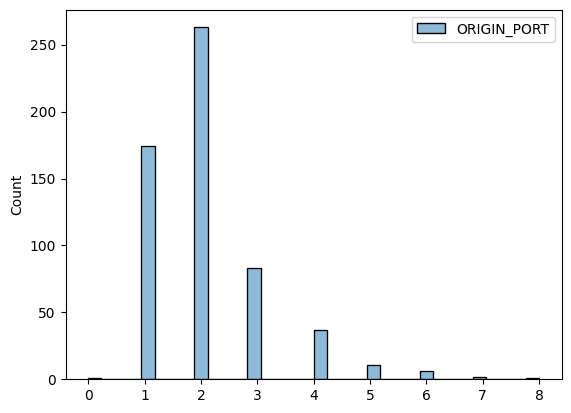

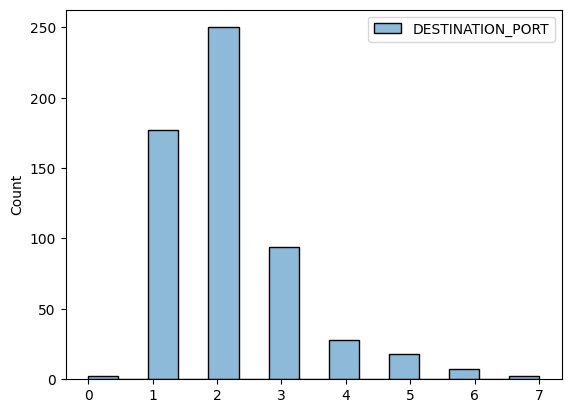

In [88]:
port_counts_orig = df[df['PLANNED'] == False].groupby('REFERENCE_ID')['ORIGIN_PORT'].nunique().reset_index()
port_counts_dest = df[df['PLANNED'] == False].groupby('REFERENCE_ID')['DESTINATION_PORT'].nunique().reset_index()

print(port_counts_orig)
print(port_counts_dest)
sns.histplot(port_counts_orig)
plt.show()
sns.histplot(port_counts_dest)
plt.show()

So it happens somewhat often that there are more than 1 origin and/or destination ports per shipment. It's also strange to me that some have zero destination ports.

In [89]:
port_counts_orig[port_counts_orig['ORIGIN_PORT'] == 0]

,REFERENCE_ID,ORIGIN_PORT
499,11c32ab9-0cce-4f92-a3ba-ca987f977cf8,0


In [90]:
df[df['REFERENCE_ID'] == '11c32ab9-0cce-4f92-a3ba-ca987f977cf8']

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
52885,11c32ab9-0cce-4f92-a3ba-ca987f977cf8,2024-06-27 04:21:30.000 Z,653d9176-7355-4c56-8c30-d88ca91dfbb1,2024-06-27 16:38:36.000 Z,NaN,NaN,New shipment detected (empty container returned),New shipment detected (empty container returned),NaN,NaN,carrier,2024-06-27 11:33:00.000 Z,False,TCKU7184580,NaN,Sealand
53157,11c32ab9-0cce-4f92-a3ba-ca987f977cf8,2024-06-27 04:21:30.000 Z,653d9176-7355-4c56-8c30-d88ca91dfbb1,2024-06-27 16:38:36.000 Z,NaN,NaN,GTOT EMPTY TRUCK ACT,Gate out empty,Truck,"{\n ""city"": ""Gelang Patah"",\n ""country"": ""Ma...",carrier,2024-06-26 11:32:00.000 Z,False,TCKU7184580,NaN,Sealand
156913,11c32ab9-0cce-4f92-a3ba-ca987f977cf8,2024-06-27 04:21:30.000 Z,ed186ee4-71ce-4eee-9e97-dd664a92c1f9,2024-06-27 04:37:20.000 Z,NaN,NaN,GTOT EMPTY TRUCK ACT,Gate out empty,Truck,"{\n ""city"": ""Gelang Patah"",\n ""country"": ""Ma...",carrier,2024-06-26 11:32:00.000 Z,False,TCKU7184580,NaN,Sealand


Oops, this means I need to drop nans first.

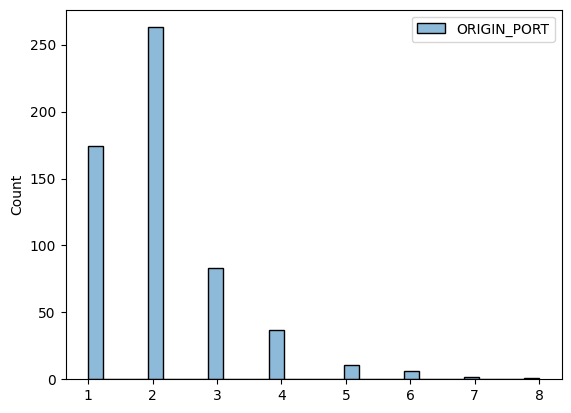

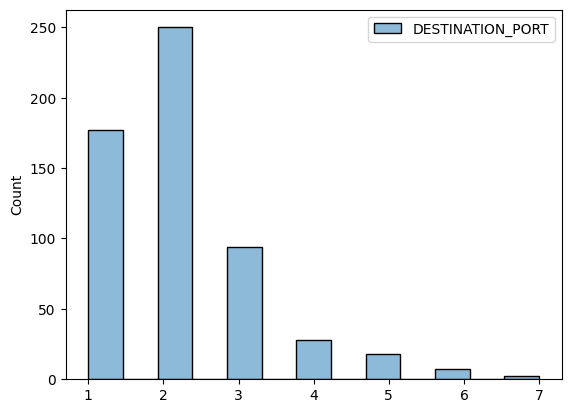

In [91]:
port_counts_orig = df[df['PLANNED'] == False].dropna(subset=['ORIGIN_PORT']).groupby('REFERENCE_ID')['ORIGIN_PORT'].nunique().reset_index()
port_counts_dest = df[df['PLANNED'] == False].dropna(subset=['DESTINATION_PORT']).groupby('REFERENCE_ID')['DESTINATION_PORT'].nunique().reset_index()
sns.histplot(port_counts_orig)
plt.show()
sns.histplot(port_counts_dest)
plt.show()

It looks like the majority of shipments have a destination or origin port that changes throughout the shipment, maybe this happens as it's going from one port to the next? To quantify this:

In [103]:
print('ORIGIN', len(port_counts_orig[port_counts_orig['ORIGIN_PORT'] == 1]), len(port_counts_orig[port_counts_orig['ORIGIN_PORT'] > 1]))
print('DESTINATION', len(port_counts_dest[port_counts_dest['DESTINATION_PORT'] == 1]), len(port_counts_dest[port_counts_dest['DESTINATION_PORT'] > 1]))

ORIGIN 174 403
DESTINATION 177 399


### Task 4:

Create a matrix that shows all events reported (not just the 8 core ocean). For these events show:

- which carriers report the event
- if the event has been reported as an estimate, an actual, or both

I'm interpreting this question as an aggregation one, so summarize the information by event, collecting which carriers correspond to each event and if these are planned, actual, or both. First I will group by event, and do aggregation operations with carrier and the planned columns.

In [7]:
grouped_df = df.groupby('EVENT_DESCRIPTION').agg({
    'CARRIER_NAME': lambda x: list(x.unique()),
    'PLANNED': lambda x: list(x.unique()),
    
}).reset_index()

In [8]:
grouped_df

,EVENT_DESCRIPTION,CARRIER_NAME,PLANNED
0,Arrival by Truck at Port terminal,[Yang Ming],[False]
1,Arrival by Vessel at Port terminal,[Yang Ming],[False]
2,Available for release / delivery,"[OOCL, COSCO, ZIM, ANL, Sealand]","[False, True]"
3,BARGE FULL DISCHARGING,[Namsung Shipping],[False]
4,BARGE FULL LOADING,[Namsung Shipping],[False]
...,...,...,...
135,updatedEtn,[Safmarine],[True]
136,"{""LSRF_Hold"":""RELEASED""}","[Safmarine, Ocean Network Express (ONE), Hambu...",[False]
137,"{""eventType"":""ETS"",""eventTypeDescription"":""ETS""}",[Safmarine],[True]
138,"{""gesperrt"":false}","[Yang Ming, Ocean Network Express (ONE)]",[False]


This new dataframe (or matrix) provides a list of all options for the `EVENT_DESCRIPTION` column. For each event, it lists the carriers that record these events and whether the events are planned (True) or actual (False) or both.

# Bonus

There are a few other common questions we typically ask of this data. If you would like to add a bonus chart or insight to your submission you can see some of the other questions we ask of the data listed below:

- Events have been known to happen at an origin or destination port but this detail is not captured in the event name. Are you able to find any instances where the event happened at either the origin/destination ports but the event name was not updated to reflect that? e.g. [gate out empty] should be [gate out empty at origin port] based on a location match
- A data enrichment process enhances the vessel data. What gaps still exist regarding the 3 vessel data points of [imo], [mmsi], [vessel]?
- Events with the source [ais] are additional vessel events provided where the carrier does not report the vessel event. How many more [Vessel departure from origin port] and [Vessel arrived at destination port] events have we seen that were not reported by source [carrier]?
- Calculate import dwell time per destination port to determine which ports may perform better in regard to container throughput.
- Visualizations: any data visualization you can provide with your work to help the end user achieve your level of understanding of the data as efficiently as possible.
- Any other insights you derived while exploring this data set? Please feel free to share them with any context you might have.
- Publish to Tableau public to share with Vizion if you work in Tableau as this is how we do most of our data visualization and reporting today.

I decided to calculate import dwell time per destination port to determine which ports may perform better in regard to container throughput.

With an accompanying visualization.

Starting from the dataframe I already created to calculate dwell times.

In [14]:
print(filtered_df_dwell[['REFERENCE_ID', 'EVENT_DESCRIPTION', 'EVENT_TIMESTAMP', 'DESTINATION_PORT']])

                                REFERENCE_ID  \
83      10b3360f-5df8-4b5f-91c5-abda720128a5   
88      01d769d5-1a3e-4a82-8c91-4f036d5ec64a   
104     7fb0446d-fad0-464f-a8ee-bf44f20afa51   
113     005f7f0d-f796-4ef0-9048-9241c9386b08   
118     040eab22-de1b-496f-8ef4-91c98c6d482b   
...                                      ...   
196023  01096908-8a71-46e1-93ed-8172c8f77e39   
196055  0885e461-b78f-42a5-bbb4-2aabe98868bb   
196068  028ab5f2-ea21-45ac-bc83-1060b54642eb   
196153  02f23890-cae4-4ff2-b8cb-50fa8e3b6122   
196170  02f23890-cae4-4ff2-b8cb-50fa8e3b6122   

                                 EVENT_DESCRIPTION            EVENT_TIMESTAMP  \
83                  Gate out from destination port  2024-06-21 13:10:00.000 Z   
88                  Gate out from destination port  2024-07-09 14:01:00.000 Z   
104                 Gate out from destination port  2024-07-06 21:56:00.000 Z   
113     Discharged from vessel at destination port  2024-08-04 08:28:00.000 Z   
118               

Looking more closely at the `DESTINATION_PORT` column.

In [23]:
json.loads(filtered_df_dwell['DESTINATION_PORT'].iloc[0])

{'bic_cd': None,
 'city': 'Mobile',
 'country': 'United States',
 'facility': 'Mobile Container Terminal ( R103 ) 901     901 Ezra Trice Blvd. Mobile United States 36603',
 'facility_code': None,
 'firms_cd': None,
 'geolocation': {'latitude': 30.69537, 'longitude': -88.03989},
 'lookup_method': 'CACHE',
 'lookup_params': {'facilityType': 'port',
  'locationLookupName': 'Mobile Container Terminal ( R103 ) 901     901 Ezra Trice Blvd. Mobile United States 36603, Mobile Container Terminal ( R103 )',
  'locationType': 'coastal',
  'locode': 'USMOB',
  'providerCode': 'SUDU'},
 'lookup_result': None,
 'name': 'Mobile',
 'smdg_cd': None,
 'splc_cd': None,
 'state': 'Alabama',
 'unlocode': 'USMOB'}

It would be pretty fun to map this using the geolocation. Let's pull that and the name of the port.

In [26]:
print(json.loads(filtered_df_dwell['DESTINATION_PORT'].iloc[0])['city'])
print(json.loads(filtered_df_dwell['DESTINATION_PORT'].iloc[0])['geolocation'])

Mobile
{'latitude': 30.69537, 'longitude': -88.03989}


Now put this into the aggregation function I previously used to get the dwell times.

In [73]:
filtered_df_dwell['EVENT_TIMESTAMP'] = pd.to_datetime(filtered_df_dwell['EVENT_TIMESTAMP'])

grouped_df = filtered_df_dwell.groupby('REFERENCE_ID').agg({
    'EVENT_TIMESTAMP': lambda x: x.max() - x.min(),
    'DESTINATION_PORT': lambda x: list(x.unique())
}).reset_index()
grouped_df = grouped_df.rename(columns={'EVENT_TIMESTAMP': 'duration'})
print(grouped_df)

                             REFERENCE_ID         duration  \
0    000368a8-f6ee-4b64-8703-962cb95d50f7 16 days 01:52:00   
1    0003c20e-d825-4be4-b10c-c97ba64a5d14  6 days 00:27:00   
2    0004450d-97e2-47cd-be1f-bb962adea35a  4 days 01:41:00   
3    00046ba3-62c5-40a3-b3ef-5622ab09e113  2 days 18:57:00   
4    0004dab1-0da0-42ad-b644-dc29ee66b537  4 days 20:40:00   
..                                    ...              ...   
376  58bbae2e-03d0-4cea-8644-479d0d8281cf  4 days 08:01:00   
377  69b005e4-007c-4f13-82e5-aa6a34f60f25  2 days 18:10:00   
378  707c4da7-c2b3-4b69-b7d0-832be28f76c0  1 days 04:30:00   
379  7fb0446d-fad0-464f-a8ee-bf44f20afa51  6 days 03:02:00   
380  924b8c26-7f7a-419b-9d81-c4857a918b8e  8 days 05:31:00   

                                      DESTINATION_PORT  
0    [{\n  "bic_cd": null,\n  "city": "Manaus",\n  ...  
1    [{\n  "bic_cd": "USMPHWANA",\n  "city": "Mt. P...  
2    [{\n  "bic_cd": null,\n  "city": "Felixstowe",...  
3    [{\n  "bic_cd": null,\

Now operate on the destination port column to make it into city and coordinate columns.

In [74]:
def extract_city_geolocation(dest_port_json):
    destination = json.loads(dest_port_json[0])
    city = destination['city']
    latitude = destination['geolocation']['latitude']
    longitude = destination['geolocation']['longitude']
    return city, latitude, longitude

In [75]:
grouped_df[['city', 'latitude', 'longitude']] = grouped_df['DESTINATION_PORT'].apply(
    lambda x: pd.Series(extract_city_geolocation(x))
)

In [76]:
grouped_df

,REFERENCE_ID,duration,DESTINATION_PORT,city,latitude,longitude
0,000368a8-f6ee-4b64-8703-962cb95d50f7,16 days 01:52:00,"[{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ...",Manaus,-3.13333,-60.01667
1,0003c20e-d825-4be4-b10c-c97ba64a5d14,6 days 00:27:00,"[{\n ""bic_cd"": ""USMPHWANA"",\n ""city"": ""Mt. P...",Mt. Pleasant,32.83333,-79.89083
2,0004450d-97e2-47cd-be1f-bb962adea35a,4 days 01:41:00,"[{\n ""bic_cd"": null,\n ""city"": ""Felixstowe"",...",Felixstowe,51.94778,1.31472
3,00046ba3-62c5-40a3-b3ef-5622ab09e113,2 days 18:57:00,"[{\n ""bic_cd"": null,\n ""city"": ""Long Beach"",...",Long Beach,33.76667,-118.18333
4,0004dab1-0da0-42ad-b644-dc29ee66b537,4 days 20:40:00,"[{\n ""city"": ""Quetzal"",\n ""country"": ""Guatem...",Quetzal,13.93063,-90.75803
...,...,...,...,...,...,...
376,58bbae2e-03d0-4cea-8644-479d0d8281cf,4 days 08:01:00,"[{\n ""bic_cd"": null,\n ""city"": ""Long Beach"",...",Long Beach,33.76667,-118.18333
377,69b005e4-007c-4f13-82e5-aa6a34f60f25,2 days 18:10:00,"[{\n ""bic_cd"": null,\n ""city"": ""Liverpool"",\...",Liverpool,53.41667,-3.00000
378,707c4da7-c2b3-4b69-b7d0-832be28f76c0,1 days 04:30:00,"[{\n ""bic_cd"": null,\n ""city"": ""Felixstowe"",...",Felixstowe,51.96173,1.35126
379,7fb0446d-fad0-464f-a8ee-bf44f20afa51,6 days 03:02:00,"[{\n ""bic_cd"": null,\n ""city"": ""Dubai"",\n ""...",Dubai,24.98571,55.02729


I was having trouble plotting the timedelta format of the time delay, so I converted to a float with unit days in order to maket his plot.

In [99]:
grouped_df['duration_days_float'] = grouped_df['duration'] / pd.Timedelta(days=1)

For fun, I wanted to play with geopandas to plot these destination ports on a world map and color the points by the delay time in days. This requires going to this site (natural earth - https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) and downloading some vectors, importing the shapefile into the data folder. Theses files aren't too big, so I've uploaded them to the github.

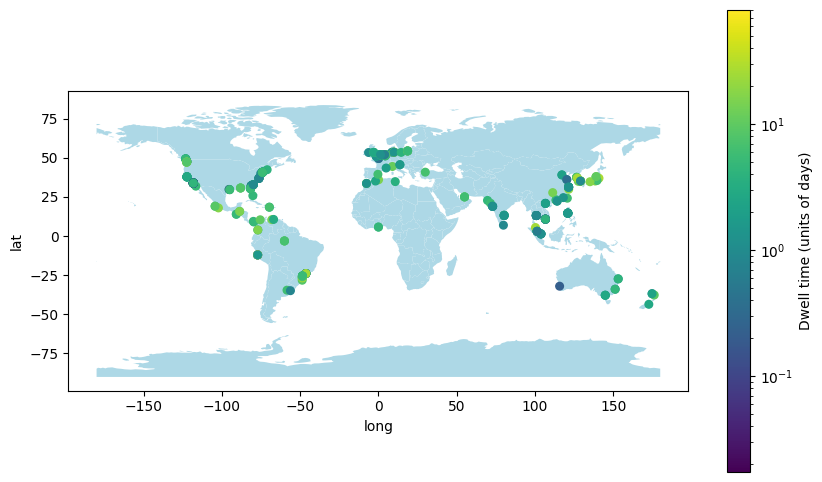

In [100]:
geometry = [Point(xy) for xy in zip(grouped_df['longitude'], grouped_df['latitude'])]
gdf = gpd.GeoDataFrame(grouped_df, geometry=geometry)

world = gpd.read_file('data/ne_110m_admin_0_countries.shp')

norm = matplotlib.colors.LogNorm(gdf['duration_days_float'].min(), gdf['duration_days_float'].max())
cmap = plt.cm.viridis  # Choose a colormap (e.g., viridis)

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightblue')

gdf.plot(ax=ax, color=cmap(norm(gdf['duration_days_float'])), markersize=30)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Dwell time (units of days)')

plt.xlabel('long')
plt.ylabel('lat')
plt.show()

Okay but this has multiple data points for each desitination port, so now I'd like to group by destination port to get an idea of what the average dwell time is per port.

In [108]:
avg_dwell = grouped_df.groupby('city').agg({
    'duration_days_float': lambda x: x.mean(),
    'latitude': lambda x: x.mean(), # if I had more time I would add some sort of test to make sure these were all the same
    'longitude': lambda x: x.mean() # but I'm assuming they are
}).reset_index()

In [109]:
avg_dwell

,city,duration_days_float,latitude,longitude
0,Amreli,5.481944,20.966670,71.55000
1,Antwerp,4.589583,51.216670,4.41667
2,Auckland,1.530208,-36.833330,174.80000
3,Bolivar,10.313889,10.376390,-75.51000
4,Boston,3.954861,42.360080,-71.05888
...,...,...,...,...
110,Vancouver,3.443472,49.286258,-123.09263
111,West Melbourne,1.812153,-37.813890,144.91194
112,Xia Men,1.424306,24.539070,118.13437
113,Yokohama,6.347222,35.450000,139.65000


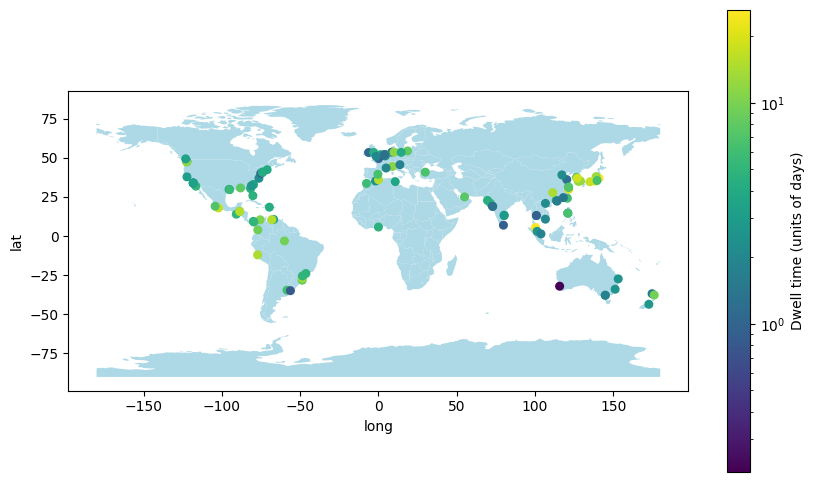

In [110]:
geometry = [Point(xy) for xy in zip(avg_dwell['longitude'], avg_dwell['latitude'])]
gdf = gpd.GeoDataFrame(avg_dwell, geometry=geometry)

world = gpd.read_file('data/ne_110m_admin_0_countries.shp')

norm = matplotlib.colors.LogNorm(gdf['duration_days_float'].min(), gdf['duration_days_float'].max())
cmap = plt.cm.viridis  # Choose a colormap (e.g., viridis)

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightblue')

gdf.plot(ax=ax, color=cmap(norm(gdf['duration_days_float'])), markersize=30)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Dwell time (units of days)')

plt.xlabel('long')
plt.ylabel('lat')
plt.show()

It would also be cool to somehow weight this by the number of data points for each port to get an idea of the sample sizes, but for now, here are the results! ^